In [1]:
import matplotlib.pyplot as plt
import gym
from IPython import display
%matplotlib inline

In [2]:
import numpy as np

In [3]:
env = gym.make('CartPole-v0')
env

<TimeLimit<CartPoleEnv<CartPole-v0>>>

In [4]:
obs = env.reset()
obs

array([ 0.02624773,  0.01684767, -0.01902834, -0.00555502])

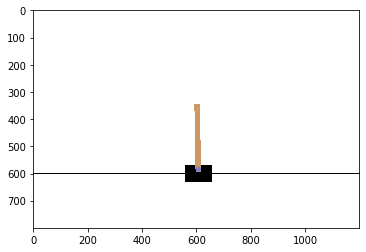

In [5]:
r = env.render(mode='rgb_array')
plt.imshow(r)

In [6]:
action = env.action_space.sample()
action

0

In [7]:
for _ in range(10):
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    print(observation,reward,done,action)
    if done: break

[ 0.02658468 -0.17799629 -0.01913944  0.28106402] 1.0 False 0
[ 0.02302476  0.01739337 -0.01351816 -0.01759344] 1.0 False 1
[ 0.02337263  0.21270655 -0.01387003 -0.31451066] 1.0 False 1
[ 0.02762676  0.4080233  -0.02016024 -0.61153527] 1.0 False 1
[ 0.03578722  0.21318884 -0.03239095 -0.32526968] 1.0 False 0
[ 0.040051    0.40875665 -0.03889634 -0.62798879] 1.0 False 1
[ 0.04822613  0.21419853 -0.05145612 -0.34780499] 1.0 False 0
[ 0.0525101   0.41001316 -0.05841222 -0.6562596 ] 1.0 False 1
[ 0.06071037  0.21575094 -0.07153741 -0.38252667] 1.0 False 0
[ 0.06502539  0.41181185 -0.07918794 -0.6968799 ] 1.0 False 1


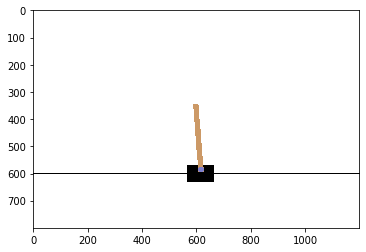

In [8]:
r = env.render(mode='rgb_array')
plt.imshow(r)

Observation:

name | min | max
--- | --- | ---
0. Cart Position| -2.4 | 2.4
1. Cart Velocity| -inf | inf
2. Pole Angle| -41.8 | 41.8
3. Pole Velo Tip| -inf | inf

In [9]:
def basic_policy(obs):
    angle=obs[2]
    return 0 if angle<0 else 1

In [33]:
totals=[]
Xs,ys=[],[]
# Xs is obs[0],obs[1],obs[2],obs[3], and action
# ys is reward 0. or 1.
for episode in range(5000):
    ep_reward=0
    obs=env.reset()
    for step in range(1000):
        act=basic_policy(obs)
        obs,reward,done,inf=env.step(act)
        
        # inputs are obs, and action
        # outsputs are reward
        sense=[obs[0],obs[1],obs[2],obs[3],float(act)]
        Xs.append(sense)
        ys.append([reward])
        assert len(Xs)==len(ys)
        
        ep_reward+=reward
        if done:
            # set rewart to something < 1.
            punish=-1
            ys[-1][0]=punish
            # if step%50==0: print(step,sense,ys[-1:])
            break
    totals.append(ep_reward)

In [34]:
len(totals), totals[:5]

(5000, [60.0, 56.0, 36.0, 34.0, 41.0])

In [35]:
for i in range(10):
    print(i,Xs[i],ys[i])

0 [-0.011664283775368104, 0.1846916638400924, 0.010528770408600839, -0.33551581602953795, 1.0] [1.0]
1 [-0.007970450498566256, 0.37966220313201193, 0.00381845408801008, -0.6248600137126236, 1.0] [1.0]
2 [-0.00037720643592601723, 0.5747306391002902, -0.00867874618624239, -0.9163379117339441, 1.0] [1.0]
3 [0.011117406346079788, 0.3797271127424907, -0.027005504420921273, -0.6263951573183602, 0.0] [1.0]
4 [0.018711948600929604, 0.18499232437454466, -0.03953340756728847, -0.3423381362331507, 0.0] [1.0]
5 [0.0224117950884205, -0.009545534093542696, -0.04638017029195149, -0.062379144363376215, 0.0] [1.0]
6 [0.022220884406549644, -0.2039728745476142, -0.047627753179219016, 0.21531736321456163, 0.0] [1.0]
7 [0.01814142691559736, -0.39838271611389897, -0.04332140591492779, 0.4926041720723277, 0.0] [1.0]
8 [0.01017377259331938, -0.5928677142283576, -0.033469322473481236, 0.7713254532526106, 0.0] [1.0]
9 [-0.0016835816912477708, -0.7875134995216472, -0.018042813408429025, 1.0532924716581284, 0.0] 

In [36]:
for i,x in enumerate(Xs[:500]):
    y=ys[i][0]
    if y<1:
        print(i,x,y)

59 [0.1073528188563623, 0.37367727634559333, -0.21062047564116557, -0.5035964518380585, 0.0] -1
115 [-0.27088141066913496, -1.163616804880979, 0.23971795048481054, 1.348649050358987, 1.0] -1
151 [0.15779860675485677, 0.050391435391261535, -0.2113773692093451, -0.12036225589412253, 0.0] -1
185 [0.1388055224341474, 0.3789895649422424, -0.20996120799238446, -0.6370477392122994, 0.0] -1
226 [-0.18943368554240575, -0.9990017293040017, 0.23911715725592775, 1.2932342557119823, 1.0] -1
273 [0.10863067683404094, 0.9783644768700783, -0.22120636672403202, -1.2186446515288396, 0.0] -1
312 [-0.15318906457383624, -0.5589884174949369, 0.21449026901711998, 0.7637960834543698, 1.0] -1
344 [-0.17679541860758902, 0.007018175832769147, 0.2130890012914398, 0.09526575394993994, 1.0] -1
400 [-0.12836284267416923, -0.7313548643429879, 0.23107489248433988, 0.9253783062612069, 1.0] -1
440 [-0.09058454651592655, -1.1215071626162672, 0.21341107658943814, 1.53283252816177, 1.0] -1


In [37]:
np.mean(totals),np.std(totals),np.min(totals), np.max(totals)

(42.1878, 8.97145089492218, 24.0, 72.0)

In [38]:
from keras.models import Sequential
import keras.layers
from keras.layers import Dense

In [39]:
n_ins = 5
n_hidden = 4
n_outs = 1 # prob of left(0)

In [40]:
model = Sequential()
model.add(Dense(n_hidden, input_dim=n_ins, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(n_outs, activation='sigmoid'))

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 24        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [43]:
len(Xs), len(ys), Xs[0], ys[0]

(210939,
 210939,
 [-0.011664283775368104,
  0.1846916638400924,
  0.010528770408600839,
  -0.33551581602953795,
  1.0],
 [1.0])

In [44]:
model.fit(np.array(Xs), np.array(ys), epochs=150, batch_size=10)

Epoch 1/150
210939/210939 [==============================] - 20s 95us/step - loss: 0.1354 - accuracy: 0.9751
Epoch 2/150
210939/210939 [==============================] - 20s 93us/step - loss: 0.0844 - accuracy: 0.9695
Epoch 3/150
210939/210939 [==============================] - 20s 94us/step - loss: 0.0628 - accuracy: 0.9655
Epoch 4/150
210939/210939 [==============================] - 21s 98us/step - loss: 0.0466 - accuracy: 0.9628
Epoch 5/150
210939/210939 [==============================] - 20s 94us/step - loss: 0.0340 - accuracy: 0.9606
Epoch 6/150

```
Using reward of 1. or 0.

Epoch 149/150
21375/21375 [==============================] - 2s 95us/step - loss: 0.0730 - accuracy: 0.9766
Epoch 150/150
21375/21375 [==============================] - 2s 94us/step - loss: 0.0711 - accuracy: 0.9766

Using reward of 1. or -1.
TODO
```

In [ ]:
# evaluate the model
_, accuracy = model.evaluate(np.array(Xs), np.array(ys))
print('Accuracy: %.2f' % (accuracy*100))

```
model of rewared is 0. or 1.

21375/21375 [==============================] - 0s 13us/step
Accuracy: 97.66

Using reward of 1. or -1.
TODO

```

In [ ]:
# predict
l=[0.23606467357238087, 0.35173932155278925, -0.22340857547028178, -0.48516640785777343, 0.0]
r=[0.23606467357238087, 0.35173932155278925, -0.22340857547028178, -0.48516640785777343, 1.0]

X = np.array([l])
pred = model.predict(X)
print('left',pred)

X = np.array([r])
pred = model.predict(X)
print('right',pred)


In [ ]:
import random

In [ ]:
def nn_policy(obs):
    # obs [4] floats
    # return 0 or 1
    l=[obs[0],obs[1],obs[2],obs[3],0.]
    X = np.array([l])
    prob_left = model.predict(X)[0]
    r=[obs[0],obs[1],obs[2],obs[3],1.]
    X = np.array([r])
    prob_right = model.predict(X)[0]
    #r=0
    r=random.choice([0,1])
    margin=0.1
    if prob_right>prob_left+margin:
        #print('R nn_policy',prob_left,prob_right,r)
        r= 1
    elif prob_left>prob_right+margin:
        #print('L nn_policy',prob_left,prob_right,r)
        r=0
    if random.random()>.95:
        #print('nn_policy',prob_left,prob_right,r)
    return r

In [ ]:
totals=[]
env.reset()
for episode in range(500):
    ep_reward=0
    obs=env.reset()
    for step in range(1000):
        act=nn_policy(obs)
        obs,reward,done,inf=env.step(act)
        
        ep_reward+=reward
        if done:
            break
    totals.append(ep_reward)

In [27]:
# nn_policy
np.mean(totals),np.std(totals),np.min(totals), np.max(totals)

(35.826, 19.25294065850721, 9.0, 101.0)

`(22.126, 10.87208002178056, 8.0, 90.0)`
is ok but worse than random, lol

`(35.826, 19.25294065850721, 9.0, 101.0) at 500 1,-1`
better


In [ ]:
len(totals)

In [ ]:
model.save('cartpole_nn.h5')

In [ ]:
!ls -lh

In [ ]:
def nn_plus_policy(obs):
    # obs [4] floats
    # return 0 or 1
    l=[obs[0],obs[1],obs[2],obs[3],0.]
    X = np.array([l])
    prob_left = model.predict(X)[0]
    r=[obs[0],obs[1],obs[2],obs[3],1.]
    X = np.array([r])
    prob_right = model.predict(X)[0]
    #r=0
    r = basic_policy(obs)
    margin=0.1
    if prob_right>prob_left+margin:
        #print('R nn_policy',prob_left,prob_right,r)
        r= 1
    elif prob_left>prob_right+margin:
        #print('L nn_policy',prob_left,prob_right,r)
        r=0
    if random.random()>.95:
        #print('nn_policy',prob_left,prob_right,r)
    return r

In [ ]:
totals=[]
env.reset()
for episode in range(500):
    ep_reward=0
    obs=env.reset()
    for step in range(1000):
        act=nn_plus_policy(obs)
        obs,reward,done,inf=env.step(act)
        
        ep_reward+=reward
        if done:
            break
    totals.append(ep_reward)

In [ ]:
# nn_plus_policy
np.mean(totals),np.std(totals),np.min(totals), np.max(totals)